<a href="https://colab.research.google.com/github/HenrySomeCode/Transformers_From_Scratch/blob/main/Tramsformers_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://www.youtube.com/watch?v=acxqoltilME&t=10s

In [ ]:
!pip install BPEmb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.6 MB/s eta 0:00:00


In [ ]:
import math
import numpy as np
import tensorflow as tf

from bpemb import BPEmb

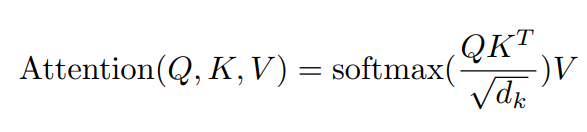

In [ ]:
def scaled_dot_product_attention(queries, keys, values, mask = None):
    """
    queries, keys & values are numpy arrays
    """

    #dk
    key_dimension = tf.cast(tf.shape(keys)[-1], tf.float32)
    #q*k^T
    scaled_scores = tf.matmul(queries, keys, transpose_b = True) / np.sqrt(key_dimension)

    if mask is not None:
        # cross all over the mask matrix, where the position is 0 on the mask matrix;
        # the corresponding position on scaled_scores is then turned to negative infinity
        scaled_scores = tf.where(mask == 0, -np.inf, scaled_scores)

    # This doesn't work: attention_weights = tf.keras.layers.Softmax(scaled_scores)
    softmax = tf.keras.layers.Softmax()
    attention_weights = softmax(scaled_scores)

    return tf.matmul(attention_weights, values), attention_weights


In [ ]:
seq_len = 3
embedding_dimension = 4

keys = np.random.rand(seq_len,embedding_dimension)
values = np.random.rand(seq_len,embedding_dimension)
queries = np.random.rand(seq_len,embedding_dimension)

print(keys)
print(values)
print(queries)

[[0.78343727 0.33750013 0.04944831 0.2808233 ]
 [0.57605793 0.641889   0.56193026 0.56074   ]
 [0.68652261 0.23002444 0.33140631 0.04859217]]
[[0.50170242 0.85506259 0.39565576 0.7338292 ]
 [0.54581225 0.33972304 0.59621842 0.70961791]
 [0.97525141 0.43817722 0.11663136 0.16561163]]
[[3.11932388e-01 7.24068968e-01 6.48632689e-04 1.50683119e-02]
 [7.53729433e-01 6.24306763e-02 6.77630505e-01 2.06181000e-01]
 [5.67636123e-01 2.73630258e-01 4.93078073e-01 7.16830044e-02]]


In [ ]:
word_embeddings, attention_weights =scaled_dot_product_attention(queries, keys, values)
print(word_embeddings, attention_weights)

tf.Tensor(
[[0.6653363  0.54058397 0.38026693 0.5477534 ]
 [0.6715168  0.53401667 0.37716088 0.54040533]
 [0.6709213  0.5354431  0.37708277 0.54106545]], shape=(3, 4), dtype=float32) tf.Tensor(
[[0.3301129  0.35765362 0.31223348]
 [0.31491783 0.36001757 0.32506463]
 [0.31789243 0.35812408 0.32398355]], shape=(3, 3), dtype=float32)


Generating keys, values, keys from input

In [ ]:
batch_size = 1
sequence_len = 3
embedding_dimension = 12
num_heads = 3
head_dimension = embedding_dimension // num_heads

In [ ]:
# A batch contains a sequence; a sequence contains three words; a word is a 12 dimensions vector
x = np.random.rand(batch_size, sequence_len, embedding_dimension)
x

array([[[0.78608054, 0.21183173, 0.00566467, 0.76862847, 0.71031782,
         0.37047427, 0.37385841, 0.98058183, 0.61360885, 0.2200685 ,
         0.23239552, 0.65476863],
        [0.56304497, 0.03042815, 0.05088991, 0.67399491, 0.33048417,
         0.67481965, 0.08620614, 0.81127222, 0.30571388, 0.81243434,
         0.03297901, 0.29107255],
        [0.03073906, 0.33408265, 0.30904505, 0.14500541, 0.71959112,
         0.93693232, 0.17591053, 0.06660776, 0.35629094, 0.01275942,
         0.86410056, 0.74607064]]])

In [ ]:
# head 0
wq0 = np.random.rand(embedding_dimension, head_dimension).round(1)
wk0 = np.random.rand(embedding_dimension, head_dimension).round(1)
wv0 = np.random.rand(embedding_dimension, head_dimension).round(1)

# head 1
wq1 = np.random.rand(embedding_dimension, head_dimension).round(1)
wk1 = np.random.rand(embedding_dimension, head_dimension).round(1)
wv1 = np.random.rand(embedding_dimension, head_dimension).round(1)

# head 3
wq2 = np.random.rand(embedding_dimension, head_dimension).round(1)
wk2 = np.random.rand(embedding_dimension, head_dimension).round(1)
wv2 = np.random.rand(embedding_dimension, head_dimension).round(1)

In [ ]:
q0 = np.dot(x,wq0)
k0 = np.dot(x,wk0)
v0 = np.dot(x,wv0)

q1 = np.dot(x,wq1)
k1 = np.dot(x,wk1)
v1 = np.dot(x,wv1)

q2 = np.dot(x,wq2)
k2 = np.dot(x,wk2)
v2 = np.dot(x,wv2)


In [ ]:
print(q0)
print(k0)
print(v0)

[[[3.58925325 2.65143095 2.63854003 3.69023171]
  [2.82295369 2.14586839 1.73142059 3.12435269]
  [1.93092831 1.84780347 2.22195193 2.72051102]]]
[[[2.33952856 3.20214827 3.98714511 2.81381629]
  [1.89455633 1.8579262  3.15909263 2.24504597]
  [2.3661631  2.49715205 3.19691229 1.1895102 ]]]
[[[2.90672254 3.30086074 2.29568125 3.57240902]
  [2.30084791 2.51840592 1.8136239  2.38642047]
  [2.80579626 2.93650766 2.27300657 3.08899197]]]


From keys, values, queries calculate the final word embeddings

In [ ]:
word_embeddings0, attention_weights0 = scaled_dot_product_attention(q0,k0,v0)
word_embeddings1, attention_weights1 = scaled_dot_product_attention(q1,k1,v1)
word_embeddings2, attention_weights2 = scaled_dot_product_attention(q2,k2,v2)


In [ ]:
combined_out_a = np.concatenate((word_embeddings0, word_embeddings1, word_embeddings2),axis=-1)
combined_out_a

array([[[2.9006996, 3.291412 , 2.2913005, 3.5585787, 2.4638085,
         3.066515 , 3.182633 , 3.4608467, 3.4365816, 3.1788144,
         2.7022674, 2.9625454],
        [2.8901541, 3.2751093, 2.2835712, 3.534658 , 2.4572585,
         3.045785 , 3.1372395, 3.4229867, 3.4055333, 3.126232 ,
         2.6588664, 2.9291644],
        [2.8846254, 3.2669306, 2.2794278, 3.5225668, 2.4656382,
         3.0702217, 3.190379 , 3.4654315, 3.4049816, 3.1256375,
         2.658096 , 2.9287739]]], dtype=float32)

That's how multi-head attention works, from an embedded sequence input to another embedded sequence.

This is done using three heads, each with its own query, key, and value matrices.

Now I'll do the same thing, but this time, only a single query matrix, a single key matrix, and a single value matrix.

In [ ]:
# I pretend to generate a single query matrix, a single key matrix,
# and a single value matrix by merging (wq0, wq1, wq2) to wq, (wk1, wk2, wk3)
# and (wv0,wv1,wv2) to wk and wv. So that I would have the result of the method above.

wq = np.concatenate((wq0, wq1, wq2),axis=1)
wk = np.concatenate((wk0, wk1, wk2),axis=1)
wv = np.concatenate((wv0, wv1, wv2),axis=1)

In [ ]:
wq # 12x12

array([[0.8, 0.9, 0.5, 0.6, 0.1, 0.7, 0.1, 0.1, 0.9, 0.1, 0.3, 0.8],
       [0.4, 0.8, 0.2, 0.7, 0.4, 0.5, 0.2, 0.9, 0.4, 0.8, 0.6, 0.1],
       [0.1, 0.3, 1. , 0.5, 0.9, 0.8, 0.3, 0.4, 0.3, 0.4, 0.9, 0.4],
       [0.7, 0. , 0.3, 0.9, 0.7, 0. , 0.2, 0.6, 0.2, 0.8, 0.2, 0.4],
       [0.3, 0.7, 0.4, 0.4, 0.5, 0.2, 0. , 0.4, 0.9, 0.5, 0.4, 0.1],
       [0. , 0.1, 0.2, 0.4, 0.8, 0.7, 0.2, 1. , 0.3, 0.4, 0.1, 0.3],
       [0.2, 0.7, 0.4, 0.2, 0.2, 0.6, 0.9, 0. , 1. , 0.4, 0.5, 0.1],
       [0.8, 0.3, 0.5, 0.5, 0. , 0.6, 0.4, 0.7, 0.2, 0.8, 0.8, 0.4],
       [0.8, 0. , 0.5, 0.7, 0.1, 0.6, 0.5, 0.1, 0.7, 0.4, 0.9, 0.5],
       [0.8, 1. , 0.1, 1. , 0.2, 0.4, 0.6, 1. , 0.4, 0.4, 0.1, 0.4],
       [0.6, 0.3, 0.5, 0.6, 0.7, 1. , 0.6, 1. , 0.5, 0.9, 0.7, 0.2],
       [0.7, 0.6, 0.8, 0.9, 0.7, 0.1, 0.9, 0.5, 0.1, 0.1, 0.3, 0.1]])

In [ ]:
q = np.dot(x,wq)
k = np.dot(x,wk)
v = np.dot(x,wv)

In [ ]:
q

array([[[3.58925325, 2.65143095, 2.63854003, 3.69023171, 2.15917839,
         2.62882877, 2.24677426, 2.91491746, 2.9672616 , 2.9107033 ,
         2.74767859, 2.07834529],
        [2.82295369, 2.14586839, 1.73142059, 3.12435269, 1.72830651,
         2.09750343, 1.67158468, 2.90486764, 2.00189014, 2.26491675,
         1.72635977, 1.82559027],
        [1.93092831, 1.84780347, 2.22195193, 2.72051102, 2.82617563,
         2.53866247, 1.93967911, 3.07128814, 2.16212136, 2.36809898,
         2.19021345, 1.06756907]]])

What I want here is to convert the q above to some kind of q0, q1, q2 that I have done before:

In [ ]:
print(q0, "\n")
print(q1, "\n")
print(q2)

[[[3.58925325 2.65143095 2.63854003 3.69023171]
  [2.82295369 2.14586839 1.73142059 3.12435269]
  [1.93092831 1.84780347 2.22195193 2.72051102]]] 

[[[2.15917839 2.62882877 2.24677426 2.91491746]
  [1.72830651 2.09750343 1.67158468 2.90486764]
  [2.82617563 2.53866247 1.93967911 3.07128814]]] 

[[[2.9672616  2.9107033  2.74767859 2.07834529]
  [2.00189014 2.26491675 1.72635977 1.82559027]
  [2.16212136 2.36809898 2.19021345 1.06756907]]]


In [ ]:
f = np.random.rand(1,3,12)
a = tf.reshape(f,(1,-1,3,4))
a.shape

TensorShape([1, 3, 3, 4])

In [ ]:
f.shape[-1]

12

In [ ]:
q_reshape = tf.reshape(q,(batch_size, seq_len, num_heads, head_dimension))
q_reshape

<tf.Tensor: shape=(1, 3, 3, 4), dtype=float64, numpy=
array([[[[3.58925325, 2.65143095, 2.63854003, 3.69023171],
         [2.15917839, 2.62882877, 2.24677426, 2.91491746],
         [2.9672616 , 2.9107033 , 2.74767859, 2.07834529]],

        [[2.82295369, 2.14586839, 1.73142059, 3.12435269],
         [1.72830651, 2.09750343, 1.67158468, 2.90486764],
         [2.00189014, 2.26491675, 1.72635977, 1.82559027]],

        [[1.93092831, 1.84780347, 2.22195193, 2.72051102],
         [2.82617563, 2.53866247, 1.93967911, 3.07128814],
         [2.16212136, 2.36809898, 2.19021345, 1.06756907]]]])>

In [ ]:
q_transposed = tf.transpose(q_reshape,perm=[0,2,1,3]).numpy()
q_transposed

array([[[[3.58925325, 2.65143095, 2.63854003, 3.69023171],
         [2.82295369, 2.14586839, 1.73142059, 3.12435269],
         [1.93092831, 1.84780347, 2.22195193, 2.72051102]],

        [[2.15917839, 2.62882877, 2.24677426, 2.91491746],
         [1.72830651, 2.09750343, 1.67158468, 2.90486764],
         [2.82617563, 2.53866247, 1.93967911, 3.07128814]],

        [[2.9672616 , 2.9107033 , 2.74767859, 2.07834529],
         [2.00189014, 2.26491675, 1.72635977, 1.82559027],
         [2.16212136, 2.36809898, 2.19021345, 1.06756907]]]])

Do the same thing with key and value:

In [ ]:
k_reshape = tf.reshape(k,(batch_size, seq_len, num_heads, head_dimension))
k_reshape

<tf.Tensor: shape=(1, 3, 3, 4), dtype=float64, numpy=
array([[[[2.33952856, 3.20214827, 3.98714511, 2.81381629],
         [3.57516036, 3.13289612, 3.10069068, 3.04093516],
         [4.10644239, 2.49777126, 3.07509892, 3.44859166]],

        [[1.89455633, 1.8579262 , 3.15909263, 2.24504597],
         [2.85660234, 2.6549215 , 2.39794611, 2.64091405],
         [2.79571751, 2.23131822, 2.32815323, 2.63344288]],

        [[2.3661631 , 2.49715205, 3.19691229, 1.1895102 ],
         [3.21192855, 2.95514817, 1.71282057, 1.81224498],
         [2.95804733, 2.26867585, 1.59060609, 2.26358291]]]])>

In [ ]:
k_transposed = tf.transpose(k_reshape,perm=[0,2,1,3]).numpy()
k_transposed

array([[[[2.33952856, 3.20214827, 3.98714511, 2.81381629],
         [1.89455633, 1.8579262 , 3.15909263, 2.24504597],
         [2.3661631 , 2.49715205, 3.19691229, 1.1895102 ]],

        [[3.57516036, 3.13289612, 3.10069068, 3.04093516],
         [2.85660234, 2.6549215 , 2.39794611, 2.64091405],
         [3.21192855, 2.95514817, 1.71282057, 1.81224498]],

        [[4.10644239, 2.49777126, 3.07509892, 3.44859166],
         [2.79571751, 2.23131822, 2.32815323, 2.63344288],
         [2.95804733, 2.26867585, 1.59060609, 2.26358291]]]])

In [ ]:
v_reshape = tf.reshape(v,(batch_size, seq_len, num_heads, head_dimension))
v_reshape

<tf.Tensor: shape=(1, 3, 3, 4), dtype=float64, numpy=
array([[[[2.90672254, 3.30086074, 2.29568125, 3.57240902],
         [2.47598513, 3.10329162, 3.26285209, 3.52616828],
         [3.44956929, 3.19837143, 2.72041608, 2.97505534]],

        [[2.30084791, 2.51840592, 1.8136239 , 2.38642047],
         [2.22606888, 2.57926254, 2.16275381, 2.84887565],
         [2.72024755, 2.41883634, 1.70207121, 2.46246025]],

        [[2.80579626, 2.93650766, 2.27300657, 3.08899197],
         [2.60366801, 2.72329766, 2.29150583, 2.01032939],
         [2.97071425, 1.51759986, 2.04888071, 1.94188752]]]])>

In [ ]:
v_transposed = tf.transpose(v_reshape,perm=[0,2,1,3]).numpy()
v_transposed

array([[[[2.90672254, 3.30086074, 2.29568125, 3.57240902],
         [2.30084791, 2.51840592, 1.8136239 , 2.38642047],
         [2.80579626, 2.93650766, 2.27300657, 3.08899197]],

        [[2.47598513, 3.10329162, 3.26285209, 3.52616828],
         [2.22606888, 2.57926254, 2.16275381, 2.84887565],
         [2.60366801, 2.72329766, 2.29150583, 2.01032939]],

        [[3.44956929, 3.19837143, 2.72041608, 2.97505534],
         [2.72024755, 2.41883634, 1.70207121, 2.46246025],
         [2.97071425, 1.51759986, 2.04888071, 1.94188752]]]])

In [ ]:
word_embeddings_all_heads, attention_weights_all_heads = scaled_dot_product_attention(
    q_transposed, k_transposed, v_transposed)
word_embeddings_all_heads

<tf.Tensor: shape=(1, 3, 3, 4), dtype=float32, numpy=
array([[[[2.9006994, 3.2914119, 2.2913   , 3.5585785],
         [2.8901541, 3.2751093, 2.283571 , 3.5346577],
         [2.8846254, 3.2669308, 2.2794278, 3.522567 ]],

        [[2.4638085, 3.066515 , 3.182633 , 3.4608467],
         [2.4572585, 3.045785 , 3.1372395, 3.4229867],
         [2.4656382, 3.0702217, 3.1903791, 3.4654317]],

        [[3.4365816, 3.1788144, 2.7022674, 2.9625454],
         [3.405533 , 3.1262317, 2.6588664, 2.9291642],
         [3.4049816, 3.1256375, 2.658096 , 2.9287739]]]], dtype=float32)>

In [ ]:
combine_out_b = tf.reshape(tf.transpose(word_embeddings_all_heads, perm=[0,2,1,3]),
                           shape=(batch_size,sequence_len,embedding_dimension))

In [ ]:
combine_out_b

<tf.Tensor: shape=(1, 3, 12), dtype=float32, numpy=
array([[[2.9006994, 3.2914119, 2.2913   , 3.5585785, 2.4638085,
         3.066515 , 3.182633 , 3.4608467, 3.4365816, 3.1788144,
         2.7022674, 2.9625454],
        [2.8901541, 3.2751093, 2.283571 , 3.5346577, 2.4572585,
         3.045785 , 3.1372395, 3.4229867, 3.405533 , 3.1262317,
         2.6588664, 2.9291642],
        [2.8846254, 3.2669308, 2.2794278, 3.522567 , 2.4656382,
         3.0702217, 3.1903791, 3.4654317, 3.4049816, 3.1256375,
         2.658096 , 2.9287739]]], dtype=float32)>

Multi-Head Attention & Multi-Head Cross Attention

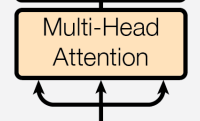

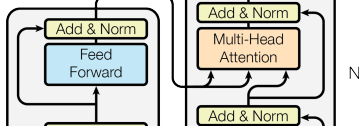

In [ ]:
class MultiHeadSelfAttention(tf.keras.layers.Layer):
    """
    d_model: dimension of model
    num_heads: number of heads
    d_head: dimension of a head
    li_layer: linear layer to generate the final output
    """
    def __init__(self,d_model, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.d_model = d_model
        self.num_heads = num_heads

        self.d_head = d_model // num_heads

        self.wq = tf.keras.layers.Dense(self.d_model)
        self.wk = tf.keras.layers.Dense(self.d_model)
        self.wv = tf.keras.layers.Dense(self.d_model)

        self.li_layer = tf.keras.layers.Dense(self.d_model)

    def split_heads(self,x):
        """
        x: query, key or value vector
        """
        batch_size, sequence_len, embedding_dimension = x.shape
        # print("split_heads x.shape: ",x.shape)

        # Here's another version:
        # split_inputs = tf.reshape(x,(batch_size, -1, self.num_heads, self.d_head))
        # -1 means it could be any number as long as the total dimension remain the same
        # Learn more at: https://www.tensorflow.org/api_docs/python/tf/reshape
        split_inputs = tf.reshape(x,(batch_size, sequence_len,
                                     self.num_heads, self.d_head))
        return tf.transpose(split_inputs, perm=[0,2,1,3])

    def merge_heads(self,x):
        """
        x: word embedding outputs from uncompleted multi-head self-attention
        x shape: batch_size, num_heads, sequence_len, d_head
        """
        batch_size, num_heads, sequence_len, d_head = x.shape
        # print("merge_heads x.shape: ",x.shape)

        merged_outputs = tf.transpose(x, perm=[0,2,1,3])
        return  tf.reshape(merged_outputs,(batch_size, sequence_len,
                                     self.d_model))
    def call(self, x,cross,k,v, mask):

        if(cross==True):
          q = self.wq(x)
          k = self.wk(k)
          v = self.wv(v)
        else:
          q = self.wq(x)
          k = self.wk(x)
          v = self.wv(x)

        q = self.split_heads(q)
        k = self.split_heads(k)
        v = self.split_heads(v)

        word_embedding_outputs, attention_weights = scaled_dot_product_attention(q,k,v,mask)
        output = self.merge_heads(word_embedding_outputs)

        return self.li_layer(output), attention_weights



In [ ]:
mhsa = MultiHeadSelfAttention(12, 3)

output, attn_weights = mhsa(x,False,None,None, None)
print(f"MHSA output{output.shape}:")
print(output)

MHSA output(1, 3, 12):
tf.Tensor(
[[[ 0.27592686  0.03763336  1.319209   -0.18736583  1.4304428
    0.37117565 -0.10064781 -1.1951718   0.21057615  0.01418197
   -0.24855408  0.45147872]
  [ 0.26678896  0.05144459  1.3167199  -0.18636772  1.4272221
    0.3677968  -0.09464031 -1.1750289   0.21750683  0.00865027
   -0.23013952  0.44932854]
  [ 0.26488647  0.04835939  1.3212421  -0.18052864  1.4247532
    0.3595174  -0.09771678 -1.1796306   0.21290988  0.01017734
   -0.2423146   0.46519774]]], shape=(1, 3, 12), dtype=float32)


Encoder Block

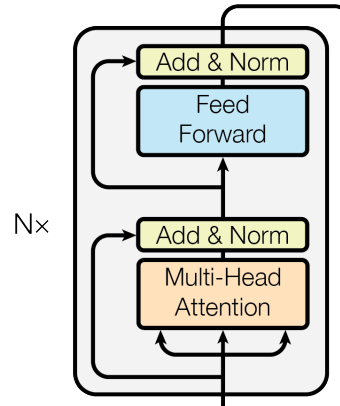

In [ ]:
def feed_forward_network(d_model, hidden_dim):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_dim, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [ ]:
class EncoderBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, hidden_dim, dropout_rate=0.1):
        super(EncoderBlock, self).__init__()

        self.mhsa = MultiHeadSelfAttention(d_model, num_heads)
        self.ffn = feed_forward_network(d_model, hidden_dim)

        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)

        self.layernorm1 = tf.keras.layers.LayerNormalization()
        self.layernorm2 = tf.keras.layers.LayerNormalization()

    def call(self, x, training, mask):
        mhsa_output,attn_weights = self.mhsa(x,False,None,None,mask)
        mhsa_output = self.dropout1(mhsa_output, training = training)
        mhsa_output = self.layernorm1(x+mhsa_output)

        ffn_output = self.ffn(mhsa_output)
        ffn_output = self.dropout2(ffn_output, training=training)
        output = self.layernorm2(mhsa_output + ffn_output)

        return output, attn_weights

In [ ]:
encoder_block = EncoderBlock(12, 3, 48)

block_output,  _ = encoder_block(x, True, None)
print(f"Output from single encoder block {block_output.shape}:")
print(block_output)

Output from single encoder block (1, 3, 12):
tf.Tensor(
[[[ 1.8242501  -0.50233185 -0.83519226  1.1618189  -0.5749973
   -0.89437103 -0.9247312   1.6043864   0.79578704 -0.86463165
   -0.6297844  -0.16020246]
  [ 1.7977773  -1.0861506  -0.68553454  1.1104181  -0.48652914
   -0.4461478  -1.0398381   1.6687504   0.63914865  0.05333441
   -0.7553736  -0.7698552 ]
  [ 0.56972873 -0.3778493  -1.0022167   0.5675548  -0.4642162
   -0.9575082  -0.796912    1.0386565   1.3808947  -1.8025631
    1.4183145   0.42611617]]], shape=(1, 3, 12), dtype=float32)


Word and Positional Embeddings

Word Embedding Layer

Say I want to convert a word to an embedding using subword tokenization. Firstly, I would need to convert that word/collection of subwords to a number or numbers and then to a vector.

I first use a subword tokenizer called BPEmb. It uses Byte-Pair Encoding and support over two hundred languages.


In [ ]:
bpemb_en = BPEmb(lang='en')

downloading https://nlp.h-its.org/bpemb/en/en.wiki.bpe.vs10000.model


100%|██████████| 400869/400869 [00:00<00:00, 401657.70B/s]


downloading https://nlp.h-its.org/bpemb/en/en.wiki.bpe.vs10000.d100.w2v.bin.tar.gz


100%|██████████| 3784656/3784656 [00:01<00:00, 2197065.14B/s]


In [ ]:
bpemb_vocab_size, bpemb_embed_size = bpemb_en.vectors.shape
print(bpemb_vocab_size)
print(bpemb_embed_size)

10000
100


In [ ]:
# Embedding for the word "car".
bpemb_en.vectors[bpemb_en.words.index('car')]

array([-0.305548, -0.325598, -0.134716, -0.078735, -0.660545,  0.076211,
       -0.735487,  0.124533, -0.294402,  0.459688,  0.030137,  0.174041,
       -0.224223,  0.486189, -0.504649, -0.459699,  0.315747,  0.477885,
        0.091398,  0.427867,  0.016524, -0.076833, -0.899727,  0.493158,
       -0.022309, -0.422785, -0.154148,  0.204981,  0.379834,  0.070588,
        0.196073, -0.368222,  0.473406,  0.007409,  0.004303, -0.007823,
       -0.19103 , -0.202509,  0.109878, -0.224521, -0.35741 , -0.611633,
        0.329958, -0.212956, -0.497499, -0.393839, -0.130101, -0.216903,
       -0.105595, -0.076007, -0.483942, -0.139704, -0.161647,  0.136985,
        0.415363, -0.360143,  0.038601, -0.078804, -0.030421,  0.324129,
        0.223378, -0.523636, -0.048317, -0.032248, -0.117367,  0.470519,
        0.225816, -0.222065, -0.225007, -0.165904, -0.334389, -0.20157 ,
        0.572352, -0.268794,  0.301929, -0.005563,  0.387491,  0.261031,
       -0.11613 ,  0.074982, -0.008433,  0.259987, 

Here, I don't need the embeddings since I'm going to use my own embedding layer. I just need the subword tokens and their respective ids. The ids will be used as indexes into the embedding layer.

In [ ]:
sample_sentence = "Where can I find a pizzeria?"
tokens = bpemb_en.encode(sample_sentence)
print(tokens)

['▁where', '▁can', '▁i', '▁find', '▁a', '▁p', 'iz', 'zer', 'ia', '?']


I can retrieve each subword token's respective id using the encode_ids method:

In [ ]:
token_seq = np.array(bpemb_en.encode_ids("Where can I find a pizzeria?"))
print(token_seq)

[ 571  280  386 1934    4   24  248 4339  177 9967]


In [ ]:
token_embed = tf.keras.layers.Embedding(bpemb_vocab_size,embedding_dimension)
token_embeddings = token_embed(token_seq)
token_embeddings

<tf.Tensor: shape=(10, 12), dtype=float32, numpy=
array([[-0.04461122,  0.01890883,  0.03434424, -0.04503877,  0.02535439,
         0.01897648,  0.01745934,  0.04894675, -0.00153736,  0.02475388,
        -0.00228628, -0.0329788 ],
       [ 0.01149695,  0.03881018, -0.0245306 ,  0.0120937 , -0.02994308,
         0.02953328, -0.01772953,  0.00361868, -0.03773403, -0.02568172,
        -0.03076073, -0.00801088],
       [ 0.02657996, -0.03073123,  0.00998415,  0.03653934, -0.00468938,
        -0.01204758,  0.02870408, -0.04083098, -0.02316518, -0.00143167,
        -0.03559735, -0.02940792],
       [-0.00660964, -0.02753652,  0.00241891, -0.04766138, -0.03074981,
        -0.04294341, -0.02310035,  0.04787371,  0.04197503, -0.00939281,
        -0.00697284, -0.02912018],
       [ 0.03569015, -0.00944052, -0.03845853, -0.02380289,  0.01532182,
         0.03237107, -0.00160576, -0.00527434, -0.04180144, -0.04876281,
         0.01305648, -0.01625718],
       [ 0.0162176 ,  0.01056536, -0.02205069

Positional Embedding Layer

In [ ]:
max_seq_len = 256
pos_embed = tf.keras.layers.Embedding(max_seq_len,embedding_dimension)
pos_idx = tf.range(len(token_seq))
pos_idx

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
position_embeddings = pos_embed(pos_idx)
position_embeddings

<tf.Tensor: shape=(10, 12), dtype=float32, numpy=
array([[-0.02159258, -0.02178797, -0.01071353,  0.00392606,  0.01474858,
         0.00230665,  0.03591781, -0.02605723, -0.02397758, -0.03842347,
        -0.02482284,  0.03916558],
       [ 0.03321915,  0.01393901,  0.01631952,  0.04426229,  0.04942925,
        -0.02498194,  0.04361388,  0.01242148,  0.01132147,  0.04454304,
        -0.04102899,  0.03399486],
       [-0.04982467,  0.02765057, -0.02570366, -0.03535713,  0.04908658,
         0.02427988,  0.01726985, -0.02289181,  0.04741284, -0.04907675,
         0.01093683, -0.03935438],
       [ 0.04328959,  0.02339108,  0.044795  , -0.01069695, -0.02157626,
        -0.04487678, -0.00117018, -0.04860222, -0.02190375, -0.01669046,
         0.02316053, -0.01734159],
       [-0.03669398, -0.03330215, -0.00041832, -0.02384672, -0.02963996,
        -0.04020852, -0.03924523,  0.00830703, -0.00238007,  0.01245204,
         0.03210623,  0.04796246],
       [-0.04369159,  0.03894093, -0.04047062

In [ ]:
final_input = token_embeddings+position_embeddings
final_input

<tf.Tensor: shape=(10, 12), dtype=float32, numpy=
array([[-0.0662038 , -0.00287913,  0.02363072, -0.04111271,  0.04010297,
         0.02128313,  0.05337714,  0.02288952, -0.02551494, -0.01366959,
        -0.02710912,  0.00618679],
       [ 0.0447161 ,  0.05274919, -0.00821109,  0.05635599,  0.01948616,
         0.00455134,  0.02588435,  0.01604016, -0.02641256,  0.01886132,
        -0.07178972,  0.02598399],
       [-0.0232447 , -0.00308066, -0.01571951,  0.00118221,  0.0443972 ,
         0.0122323 ,  0.04597393, -0.06372279,  0.02424766, -0.05050841,
        -0.02466051, -0.0687623 ],
       [ 0.03667995, -0.00414545,  0.04721392, -0.05835832, -0.05232607,
        -0.08782019, -0.02427053, -0.00072851,  0.02007127, -0.02608326,
         0.01618769, -0.04646178],
       [-0.00100382, -0.04274267, -0.03887684, -0.04764961, -0.01431814,
        -0.00783745, -0.04085099,  0.00303268, -0.04418151, -0.03631077,
         0.04516272,  0.03170528],
       [-0.02747399,  0.0495063 , -0.06252132

Encoder

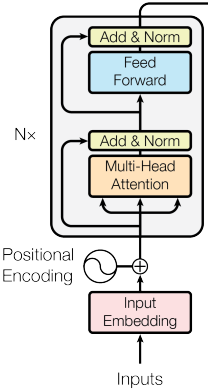



In [ ]:
class Encoder(tf.keras.layers.Layer):
    """
    input: A batch of N sequences, each sequence has max len of max_seq_len (256)
    """
    def __init__(self, num_blocks, d_model, num_heads, hidden_dim, src_vocab_size,
               max_seq_len, dropout_rate=0.1):
        super(Encoder,self).__init__()

        self.d_model = d_model
        self.max_seq_len = max_seq_len

        self.token_embed = tf.keras.layers.Embedding(src_vocab_size,self.d_model)
        self.pos_embed = tf.keras.layers.Embedding(max_seq_len, self.d_model)

        self.dropout = tf.keras.layers.Dropout(dropout_rate)

        self.blocks = [EncoderBlock(self.d_model, num_heads,hidden_dim,dropout_rate)
        for _ in range(num_blocks)]

    def call(self, input, training, mask):
        token_embeds = self.token_embed(input)

        # Batch of sequences * max length of a sequence
        num_pos = input.shape[0] * self.max_seq_len
        # [ [0,1,2...256] * Batch of sequences ]
        pos_idx = np.resize(np.arange(self.max_seq_len),num_pos)
        # [[0,1,2...256], [0,1,2...256],...Batch of sequences ]
        pos_idx = np.reshape(pos_idx, input.shape)

        pos_embeds = self.pos_embed(pos_idx)

        x = self.dropout(token_embeds + pos_embeds, training = training)

        for block in self.blocks:
            x, weights = block(x,training, mask)

        return x,weights

In [ ]:
input_batch = [
    "Where can I find a pizzeria?",
    "Mass hysteria over listeria.",
    "I ain't no circle back girl."
]

In [ ]:
input_seqs = bpemb_en.encode_ids(input_batch)
print("Vectorized inputs:")
input_seqs

Vectorized inputs:


[[571, 280, 386, 1934, 4, 24, 248, 4339, 177, 9967],
 [1535, 1354, 1238, 177, 380, 43, 871, 177, 9935],
 [386, 4, 6, 9937, 9915, 467, 5410, 810, 3692, 9935]]

Padding to make make sequences the same length

why I need to do this?

Recurrent Neural Networks or Transformer are capable of handling variable length sequences.

Despite that, it's still best to pad or truncate sequences to a uniform length for one or both of these reasons:

1. Performance. The longer a sequence, the higher the computation cost. One may want to truncate long sequences to a shorter length if that's feasible and doesn't result in too much performance loss.

2. When processing datasets in batches, each sequence in a batch usually has to be of uniform length.

In [ ]:
padded_input_seqs = tf.keras.preprocessing.sequence.pad_sequences(input_seqs, padding="post")
padded_input_seqs

array([[ 571,  280,  386, 1934,    4,   24,  248, 4339,  177, 9967],
       [1535, 1354, 1238,  177,  380,   43,  871,  177, 9935,    0],
       [ 386,    4,    6, 9937, 9915,  467, 5410,  810, 3692, 9935]],
      dtype=int32)

Mask for Encoder:

In [ ]:
enc_mask = tf.cast(tf.math.not_equal(padded_input_seqs, 0), tf.float32)
print("Input:")
print(padded_input_seqs, '\n')
print("Encoder mask:")
print(enc_mask)

Input:
[[ 571  280  386 1934    4   24  248 4339  177 9967]
 [1535 1354 1238  177  380   43  871  177 9935    0]
 [ 386    4    6 9937 9915  467 5410  810 3692 9935]] 

Encoder mask:
tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(3, 10), dtype=float32)


But the attention matrix is of shape (batch size, number of heads, embedding size, embedding size) or (3,3,10,10), so my mask need to work with that attention matrix:

In [ ]:
enc_mask = enc_mask[:, tf.newaxis, tf.newaxis, :]
enc_mask

<tf.Tensor: shape=(3, 1, 1, 10), dtype=float32, numpy=
array([[[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]]],


       [[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]]], dtype=float32)>

This way, the encoder mask will now be *broadcasted*.<br>
https://www.tensorflow.org/xla/broadcasting

In [ ]:
num_encoder_blocks = 6
d_model = 12
num_heads = 3
ffn_hidden_dim = 48

src_vocab_size = bpemb_vocab_size
max_input_seq_len = padded_input_seqs.shape[1]

encoder = Encoder(
    num_encoder_blocks,
    d_model,
    num_heads,
    ffn_hidden_dim,
    src_vocab_size,
    max_input_seq_len)



In [ ]:
encoder_output, attn_weights = encoder(padded_input_seqs, training=True,
                                       mask=enc_mask)
print(f"Encoder output {encoder_output.shape}:")
print(encoder_output)

Encoder output (3, 10, 12):
tf.Tensor(
[[[ 1.03232360e+00  1.26338273e-01  1.88199174e+00 -1.25341952e+00
   -1.03916693e+00 -1.93802714e+00  1.57654464e-01 -3.59519213e-01
    5.16445160e-01  4.35568511e-01 -1.34414524e-01  5.74225485e-01]
  [-8.01305830e-01  1.02560604e+00 -6.60630226e-01 -2.30250049e+00
    1.69294810e+00  2.42503081e-02 -3.54117036e-01  5.01149654e-01
   -6.61929309e-01  5.32735109e-01  2.89234906e-01  7.14558899e-01]
  [-1.60282350e+00  1.38714182e+00  1.64326048e+00 -1.25473440e+00
    3.23554486e-01  5.69470078e-02 -1.14738107e+00 -9.99047533e-02
   -7.91172862e-01  6.35113120e-02  9.81152058e-01  4.40449744e-01]
  [-2.85223693e-01  1.41784966e+00  1.08355856e+00 -1.53604698e+00
   -1.51518106e+00 -3.28757256e-01 -9.47925210e-01  1.08412766e+00
   -4.56656247e-01  7.61915565e-01 -2.85028428e-01  1.00736761e+00]
  [-1.47422075e+00  5.60985744e-01  9.20856476e-01 -2.13721824e+00
    1.09045279e+00 -5.10786176e-01 -1.91281945e-01  7.45311499e-01
   -3.65194887e-01 

Decoder Block

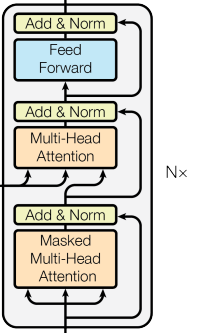

In [ ]:
class DecoderBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, hidden_dim,dropout_rate=0.1):
        super(DecoderBlock,self).__init__()

        self.mhsa1 = MultiHeadSelfAttention(d_model, num_heads)
        self.mhsa2 = MultiHeadSelfAttention(d_model, num_heads)

        self.ffn = feed_forward_network(d_model, hidden_dim)

        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout3 = tf.keras.layers.Dropout(dropout_rate)

        self.layernorm1 = tf.keras.layers.LayerNormalization()
        self.layernorm2 = tf.keras.layers.LayerNormalization()
        self.layernorm3 = tf.keras.layers.LayerNormalization()

    def call(self, encoder_output, target, training, decoder_mask, memory_mask):
        mhsa_output1, attn_weights = self.mhsa1(target,False, None, None, decoder_mask)
        mhsa_output1 = self.dropout1(mhsa_output1, training = training)
        mhsa_output1 = self.layernorm1(mhsa_output1+target)


        mhsa_output2, attn_weights = self.mhsa2(mhsa_output1,True, encoder_output,
                                            encoder_output,
                                            memory_mask)
        mhsa_output2 = self.dropout2(mhsa_output2, training = training)

        mhsa_output2 = self.layernorm2(mhsa_output2 + mhsa_output1)

        ffn_output = self.ffn(mhsa_output2)
        ffn_output = self.dropout3(ffn_output, training=training)
        output = self.layernorm3(ffn_output + mhsa_output2)

        return output, attn_weights


In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_blocks, d_model, num_heads, hidden_dim, target_vocab_size,
               max_seq_len, dropout_rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.max_seq_len = max_seq_len

        self.token_embed = tf.keras.layers.Embedding(target_vocab_size, self.d_model)
        self.pos_embed = tf.keras.layers.Embedding(max_seq_len, self.d_model)

        self.dropout = tf.keras.layers.Dropout(dropout_rate)

        self.blocks = [DecoderBlock(self.d_model, num_heads, hidden_dim, dropout_rate) for _ in range(num_blocks)]
    def call(self, encoder_output, target, training, decoder_mask, memory_mask):
        token_embeds = self.token_embed(target)

        num_pos = target.shape[0] * self.max_seq_len
        pos_idx = np.resize(np.arange(self.max_seq_len), num_pos)
        pos_idx = np.reshape(pos_idx, target.shape)

        pos_embeds = self.pos_embed(pos_idx)

        x = self.dropout(token_embeds + pos_embeds, training=training)

        for block in self.blocks:
            x, weights = block(encoder_output, x, training, decoder_mask, memory_mask)

        return x, weights

Something about the decoder mask and memory mask here...

In [ ]:
target_input_seqs = [
    [1, 652, 723, 123, 62],
    [1, 25,  98, 129, 248, 215, 359, 249],
    [1, 2369, 1259, 125, 486],
]

In [ ]:
padded_target_input_seqs = tf.keras.preprocessing.sequence.pad_sequences(target_input_seqs, padding="post")
print("Padded target inputs to the decoder:")
print(padded_target_input_seqs.shape)
print(padded_target_input_seqs)

Padded target inputs to the decoder:
(3, 8)
[[   1  652  723  123   62    0    0    0]
 [   1   25   98  129  248  215  359  249]
 [   1 2369 1259  125  486    0    0    0]]


padding mask :

In [ ]:
dec_padding_mask = tf.cast(tf.math.not_equal(padded_target_input_seqs, 0), tf.float32)
dec_padding_mask = dec_padding_mask[:, tf.newaxis, tf.newaxis, :]
print(dec_padding_mask)

tf.Tensor(
[[[[1. 1. 1. 1. 1. 0. 0. 0.]]]


 [[[1. 1. 1. 1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1. 0. 0. 0.]]]], shape=(3, 1, 1, 8), dtype=float32)


look ahead mask :

In [ ]:
target_input_seq_len = padded_target_input_seqs.shape[1]
look_ahead_mask = tf.linalg.band_part(tf.ones((target_input_seq_len,
                                               target_input_seq_len)), -1, 0)
print(look_ahead_mask)

tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]], shape=(8, 8), dtype=float32)


decoder mask = padding mask & look ahead mask :

In [ ]:
"""
Exampels of tf.minimum:

Ex1:
x = tf.constant([2, 4, 6])
y = tf.constant([1, 5, 3])

result = tf.math.minimum(x, y)

print(result.numpy())  # Output: [1 4 3]

Ex2:
if x and y are not the same size, tf.minimum will try to broadcast them
to have the same size:

x = tf.constant([1, 2, 3])  # Shape: (3,)
y = tf.constant(2)          # Scalar value

result = tf.math.minimum(x, y)

print(result.numpy())  # Output: [1 2 2]
"""
dec_mask = tf.minimum(dec_padding_mask, look_ahead_mask)
print("The decoder mask:")
print(dec_mask)

The decoder mask:
tf.Tensor(
[[[[1. 0. 0. 0. 0. 0. 0. 0.]
   [1. 1. 0. 0. 0. 0. 0. 0.]
   [1. 1. 1. 0. 0. 0. 0. 0.]
   [1. 1. 1. 1. 0. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]]]


 [[[1. 0. 0. 0. 0. 0. 0. 0.]
   [1. 1. 0. 0. 0. 0. 0. 0.]
   [1. 1. 1. 0. 0. 0. 0. 0.]
   [1. 1. 1. 1. 0. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]
   [1. 1. 1. 1. 1. 1. 0. 0.]
   [1. 1. 1. 1. 1. 1. 1. 0.]
   [1. 1. 1. 1. 1. 1. 1. 1.]]]


 [[[1. 0. 0. 0. 0. 0. 0. 0.]
   [1. 1. 0. 0. 0. 0. 0. 0.]
   [1. 1. 1. 0. 0. 0. 0. 0.]
   [1. 1. 1. 1. 0. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]
   [1. 1. 1. 1. 1. 0. 0. 0.]]]], shape=(3, 1, 8, 8), dtype=float32)


In [ ]:
# 6 blocks, 12 dimensions embedding, 3 heads, hidden layer of ffn dimension is 48
# target vocab size is 10000, maximum of a sequence length is 8
decoder = Decoder(6, 12, 3, 48, 10000, 8)
# memory mask = enc_mask
decoder_output, _ = decoder(encoder_output, padded_target_input_seqs,
                            True, dec_mask, enc_mask)
print(f"Decoder output {decoder_output.shape}:")
print(decoder_output)

Decoder output (3, 8, 12):
tf.Tensor(
[[[ 2.0763745  -0.47165573 -0.8284889  -2.1323872   0.15392499
    0.3442822   0.2368639  -0.9195965   0.6632387   0.7808786
   -0.2025379   0.29910326]
  [ 1.2906675   0.04541504  0.01313913 -1.9144204  -0.2484681
    0.7212323   0.07236852 -1.6080223   0.9465338   1.0333102
   -1.0291289   0.6773732 ]
  [ 2.0198011  -0.24576423 -0.16917978 -1.6613793  -0.7163569
    0.70729417  0.13742588 -1.6523514   0.7621565   0.5217119
   -0.29767716  0.59431934]
  [ 2.2279332   0.09267257 -0.26676527 -1.0632471  -0.31695393
   -0.16025153 -0.08656065 -1.9145851   0.74895334  0.69730496
   -0.6747688   0.7162684 ]
  [ 1.9471961  -0.17176072 -0.15524895 -2.1745317  -0.44309393
    0.6679553   0.26021308 -1.3966768   0.59949976  0.29465994
    0.01640807  0.5553802 ]
  [ 1.2995603  -0.02027464 -0.4824909  -2.1661153  -0.7329682
    1.1815834   0.41993332 -0.7980854   1.2349122   0.8683374
   -0.28923088 -0.5151614 ]
  [ 1.7970569   0.8199942  -0.69664794 -0.560

Transformer

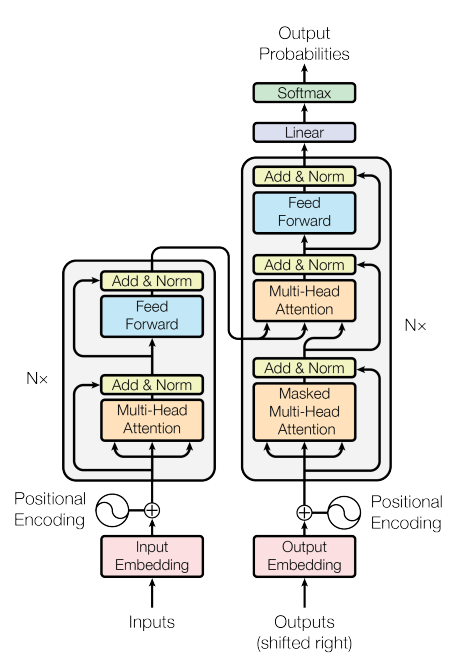

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_blocks, d_model, num_heads, hidden_dim, source_vocab_size,
               target_vocab_size, max_input_len, max_target_len, dropout_rate=0.1):
        super(Transformer,self).__init__()

        self.encoder = Encoder(num_blocks, d_model, num_heads, hidden_dim, source_vocab_size,
                           max_input_len, dropout_rate)

        self.decoder = Decoder(num_blocks, d_model, num_heads, hidden_dim, target_vocab_size,
                           max_target_len, dropout_rate)

        # The final dense layer to generate logits from the decoder output.
        self.output_layer = tf.keras.layers.Dense(target_vocab_size)
    def call(self, input_seqs, target_input_seqs, training, encoder_mask,
           decoder_mask, memory_mask):
        encoder_output, encoder_attn_weights = self.encoder(input_seqs,
                                                        training, encoder_mask)

        decoder_output, decoder_attn_weights = self.decoder(encoder_output,
                                                            target_input_seqs, training,
                                                            decoder_mask, memory_mask)

        return self.output_layer(decoder_output), encoder_attn_weights, decoder_attn_weights


In [ ]:
transformer = Transformer(
    num_blocks = 6,
    d_model = 12,
    num_heads = 3,
    hidden_dim = 48,
    source_vocab_size = bpemb_vocab_size,
    target_vocab_size = 7000, # assumed target vocabulary size.
    max_input_len = padded_input_seqs.shape[1],
    max_target_len = padded_target_input_seqs.shape[1])

transformer_output, _, _ = transformer(padded_input_seqs,
                                       padded_target_input_seqs, True,
                                       enc_mask, dec_mask, memory_mask=enc_mask)
print(f"Transformer output {transformer_output.shape}:")
print(transformer_output) # If training, we would use this output to calculate losses.

Transformer output (3, 8, 7000):
tf.Tensor(
[[[-6.40434772e-02 -8.38768706e-02  8.44978914e-02 ...  5.29928599e-04
   -2.84923799e-02 -4.63392213e-03]
  [-6.81813434e-02 -6.39475510e-02  4.70105186e-02 ... -5.13865948e-02
   -1.18084624e-03  4.65213768e-02]
  [-5.53910360e-02 -7.73879066e-02  7.72968978e-02 ...  6.11426681e-03
   -1.31159350e-02  3.34027968e-02]
  ...
  [-8.61724839e-02 -5.45612723e-02  3.92506160e-02 ... -7.91839696e-03
    1.43231004e-02  6.79058507e-02]
  [-9.46652815e-02 -6.35275841e-02  2.80247461e-02 ... -7.34280702e-03
    2.82103661e-02  6.86389133e-02]
  [-8.75296742e-02 -5.56855612e-02  6.16036877e-02 ... -1.29825491e-02
   -9.85953584e-03  3.81643884e-02]]

 [[-5.66048138e-02 -8.96669701e-02  7.63128996e-02 ... -2.13050265e-02
   -2.68607419e-02  4.72136308e-03]
  [-4.68187965e-02 -9.10151452e-02  5.22668064e-02 ... -3.00155561e-02
    1.06594991e-03 -7.84094445e-05]
  [-7.22164065e-02 -6.67552054e-02  7.47907087e-02 ...  1.28036626e-02
   -2.13747565e-02  2

That's how I made a transformer from scratch. Now, it's useful to know how this architecture works in detail. But to train it to get impressive results is expensive in both terms of computing and data.

That's why I should do transfer learning on the pre-trained transformer models in practice.